This notebook explores the relationship between the budget of movies to the Gross Revenue. The data has been sourced from https://www.the-numbers.com/movie/budgets/all

In [21]:
# Importing packages
import pandas
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
# Importing the data
df = pd.read_csv("movies-cost_revenue.csv")

In [14]:
# Checking the data
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [16]:
# Deleting redundant columns
df.drop(columns=['Rank', 'Release Date','Movie Title','Domestic Gross ($)'], inplace=True)
df.rename(columns={"Production Budget ($)": "production_budget_usd", "Worldwide Gross ($)": "worldwide_gross_usd"}, errors="raise", inplace=True)

In [17]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   production_budget_usd  5391 non-null   object
 1   worldwide_gross_usd    5391 non-null   object
dtypes: object(2)
memory usage: 84.4+ KB


In [18]:
# Removing unnecessary characters and Converting columns from string to int
df['production_budget_usd'] = df['production_budget_usd'].str.replace('[$,]', '').astype(float)
df['worldwide_gross_usd'] = df['worldwide_gross_usd'].str.replace('[$,]', '').astype(float)

C:\Users\RASHMI~1\AppData\Local\Temp/ipykernel_7252/1154386987.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['production_budget_usd'] = df['production_budget_usd'].str.replace('[$,]', '').astype(float)
C:\Users\RASHMI~1\AppData\Local\Temp/ipykernel_7252/1154386987.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['worldwide_gross_usd'] = df['worldwide_gross_usd'].str.replace('[$,]', '').astype(float)


In [20]:
# Dropping rows where Worldwide Gross = 0:
i = df.loc[df['worldwide_gross_usd'] == 0].index
df.drop(i)

,production_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0
...,...,...
5378,55000000.0,376856949.0
5379,40000000.0,166893990.0
5380,185000000.0,561137727.0
5381,175000000.0,140012608.0


In [23]:
# Defining the X and y
X = DataFrame(df, columns=['production_budget_usd']) 
y = DataFrame(df, columns=['worldwide_gross_usd']) 

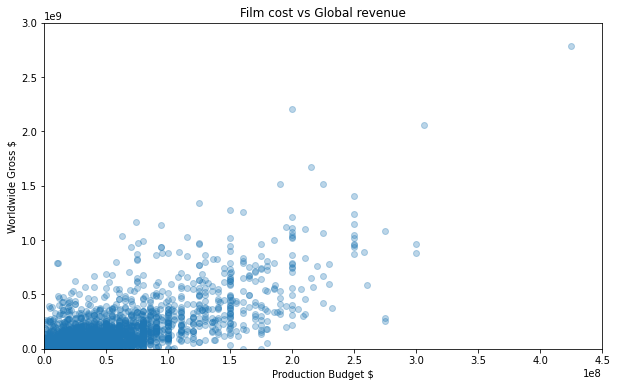

In [24]:
# Visualizing the data
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title("Film cost vs Global revenue")
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [28]:
# Training the model
regression = LinearRegression()
regression.fit(X,y)
## Slope Coeffficient:
regression.coef_

array([[3.08949319]])

In [29]:
# Intercept
regression.intercept_

array([-7270258.41995603])

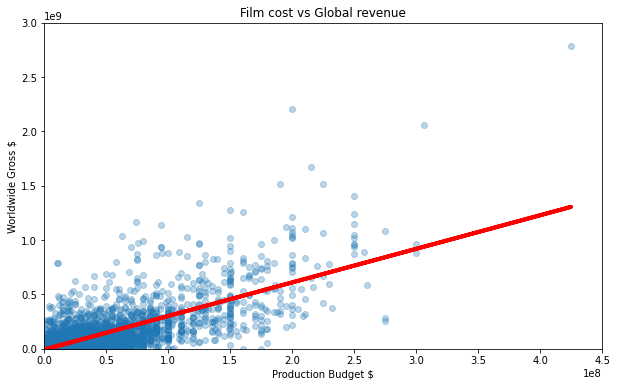

In [26]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.plot(X, regression.predict(X), color = "red", linewidth=4)
plt.title("Film cost vs Global revenue")
plt.xlabel("Production Budget $")
plt.ylabel("Worldwide Gross $")
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

In [27]:
regression.score(X, y)

0.5523479123077013